### Evaluate the presence of batch effects by PILOT

<div class="alert alert-block alert-info">
In this tutorial, we include statistical tests to evaluate association between detected clusters with any experimental or clinical variable provided in the Kidney dataset.
</div>

In [1]:
import PILOT as pl
import scanpy as sc

#### Reading the original Anndata (without filteration):
We consider the Kidney data without any filtering, we observe a high association with the tissue location: renal medulla, cortex of kidney, renal papilla or kidney).You can download the Anndata (h5ad) file from [here](https://costalab.ukaachen.de/open_data/PILOT/Kidney_ori.h5ad), and place it in the _Datasets_ folder.

In [2]:
adata = sc.read_h5ad('/Datasets/Kidney_ori.h5ad')

##### Loading the required information and computing the Wasserstein distance:
<div class="alert alert-block alert-info"> In order to work with PILOT, ensure that your Anndata object is loaded and contains the required information.
    
Use the following parameters to configure PILOT for your analysis (Setting Parameters):
    
- adata: Pass your loaded Anndata object to PILOT.
    
- emb_matrix: Provide the name of the variable in the obsm level that holds the dimension reduction (PCA representation).
    
- clusters_col: Specify the name of the column in the observation level of your Anndata that corresponds to cell types or clusters.
    
- sample_col: Indicate the column name in the observation level of your Anndata that contains information about samples or patients.
    
- status: Provide the column name that represents the status or disease (e.g., "control" or "case").
       
</div>

In [3]:
pl.tl.wasserstein_distance(
    adata,
    emb_matrix = 'X_pca',
    clusters_col = 'cell_type',
    sample_col = 'donor_id',
    status = 'disease'
    )

##### In this section, we should find the optimal number of clusters. 
<div class="alert alert-block alert-info"> 
The Silhouette Score Curve is used to find the optimal number of clusters by plotting the average Silhouette Score for different numbers of clusters. The number of clusters corresponding to the highest average Silhouette Score is considered the optimal number of clusters.
</div>

         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Fal

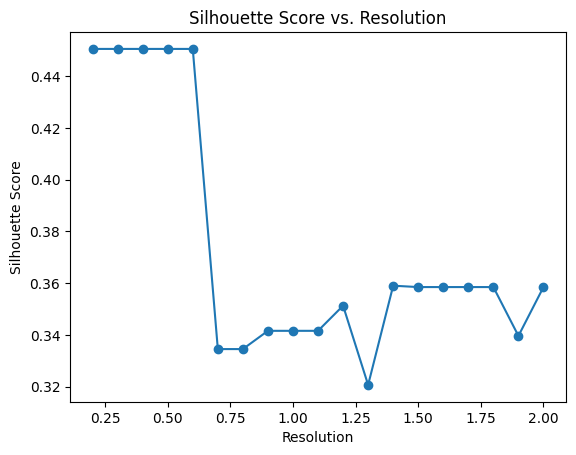

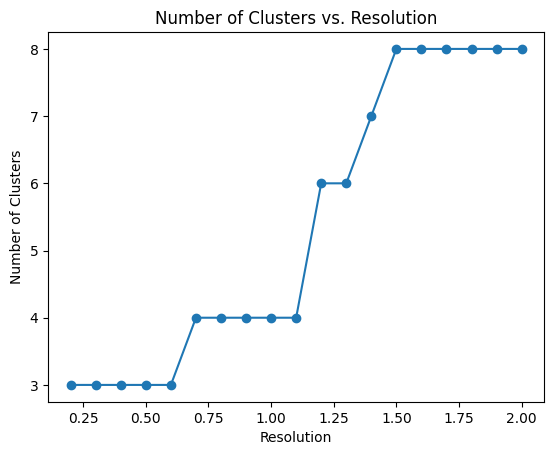

In [24]:
pl.pl.select_best_sil(adata, start = 0.2)

##### Patients sub-group detection by clustering EMD. 
<div class="alert alert-block alert-info"> 
Using the Silhouette scores of the previous step, we can find the optimal number of cluster of patients to detect different stage of disease. 
</div>

         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.


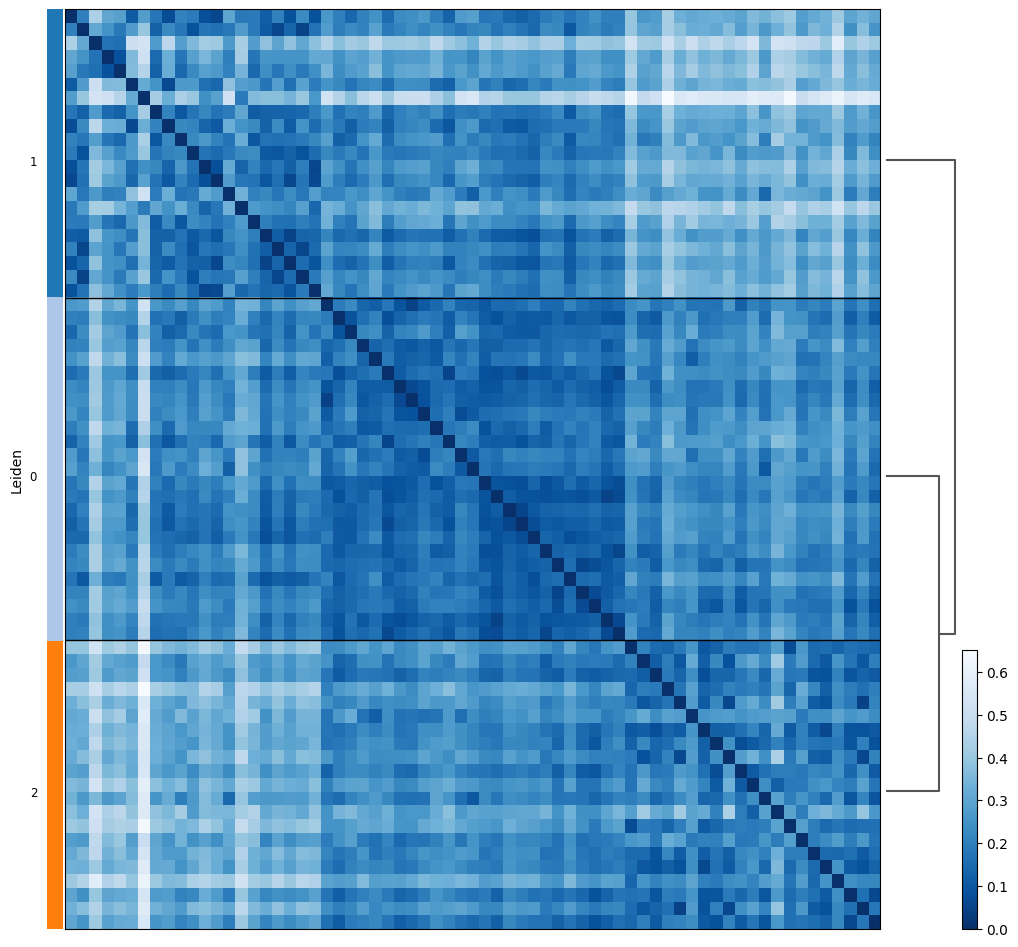

In [5]:
proportion_df=pl.pl.clustering_emd(adata, res = adata.uns['best_res'],show_gene_labels=False,sorter_leiden=['1','0','2'],save=True)

##### Statistical tests 

For categorical variables, this is based on Chi-Squared statistics on cluster analysis  while for numerical variables this is based on ANOVA for clustering analysis. For these functions, provide the sample_col as the Sample/Patient column and your interested variables. Of note, these functions show just the significant variables (p-values) and ignore the insignificant ones.

##### Categorical variables 

In [28]:
categorical = ['BMI','hypertension','development_stage','sex','eGFR','diabetes_history','disease','tissue']

In [29]:
pl.tl.correlation_categorical_with_clustering(adata, proportion_df, sample_col = 'donor_id', features = categorical)

Feature  ChiSquared_Statistic  ChiSquared_PValue
7           disease             17.488757           0.000159
6  diabetes_history              6.784615           0.009195
1               BMI              7.857195           0.049057

#####  Numerical variables

In [8]:
numeric = ['degen.score','aStr.score','aEpi.score','matrisome.score','collagen.score','glycoprotein.score','proteoglycan.score']

In [11]:
pl.tl.correlation_numeric_with_clustering(adata, proportion_df, sample_col = 'donor_id', features = numeric)

Empty DataFrame
Columns: [Feature, ANOVA_F_Statistic, ANOVA_P_Value]
Index: []

#### Visualizing Feature Distribution Within Patients sub-group 

Using the 'clinical_variables_corr_sub_clusters' function, you can effectively visualize the distribution of significant variables within the identified subgroups. Please specify 'sample_col' as the Sample/Patient column in your dataset, define the desired 'sorter_order' for the heatmap (in the previous section you can see the order), and select the variables of interest as feature.

###### Disease

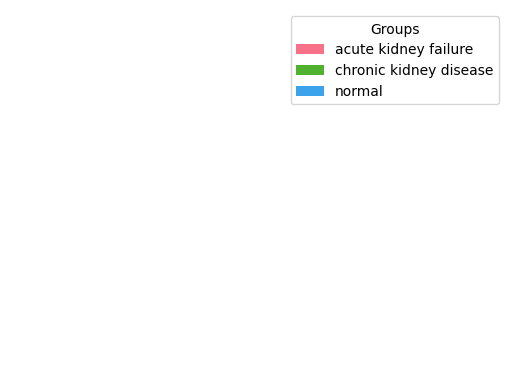

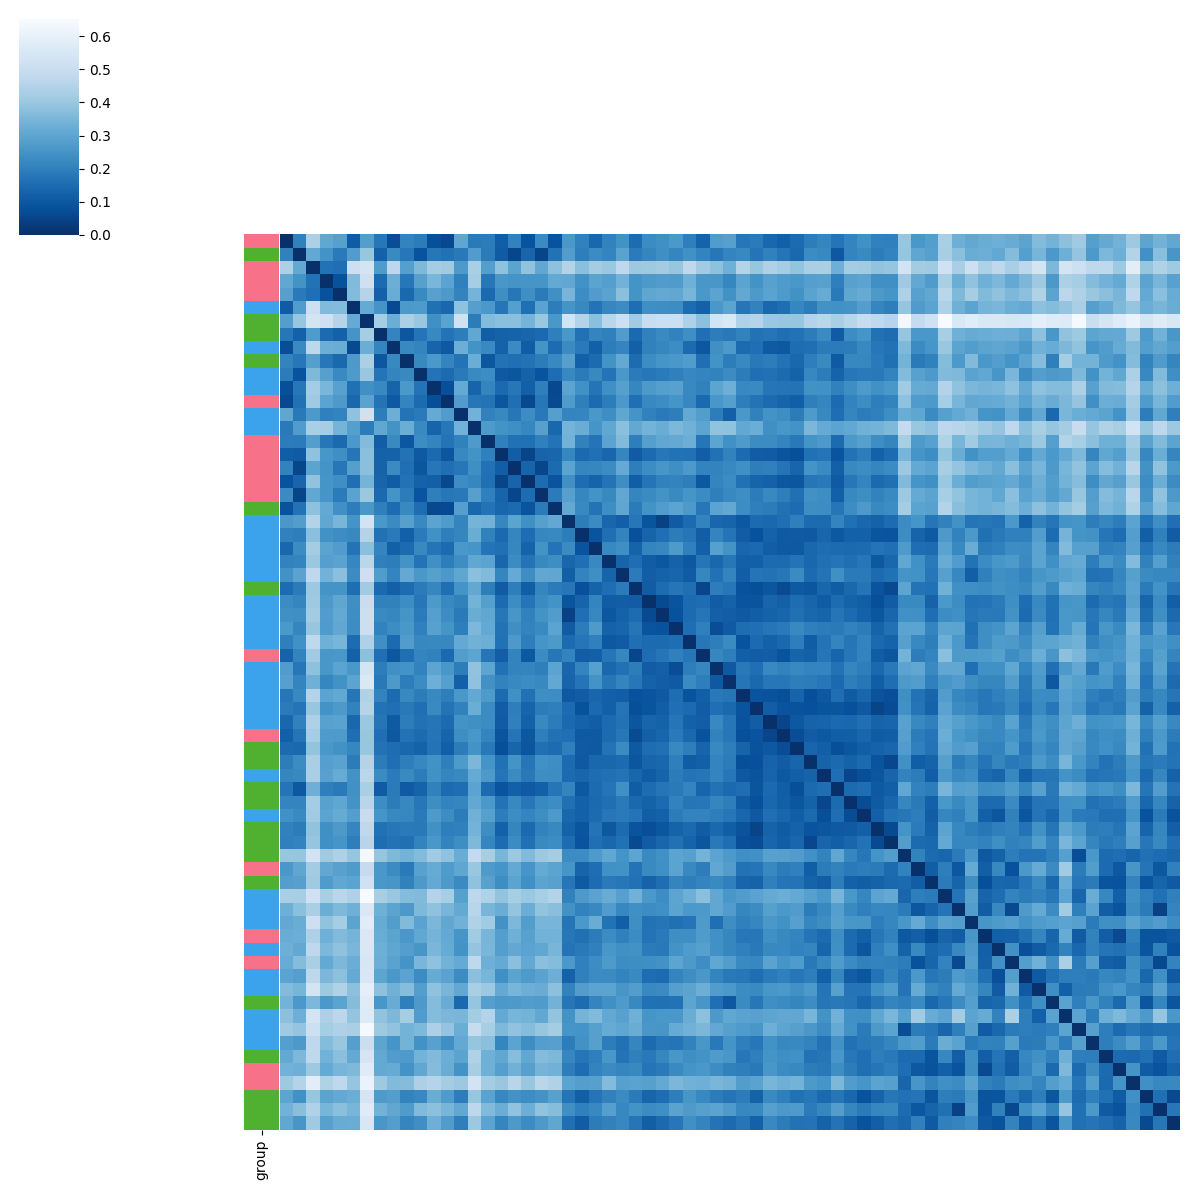

In [12]:
pl.tl.clinical_variables_corr_sub_clusters(adata,sorter_order=['1','0','2'],sample_col='donor_id',feature='disease',proportion_df=proportion_df)

###### Tissue

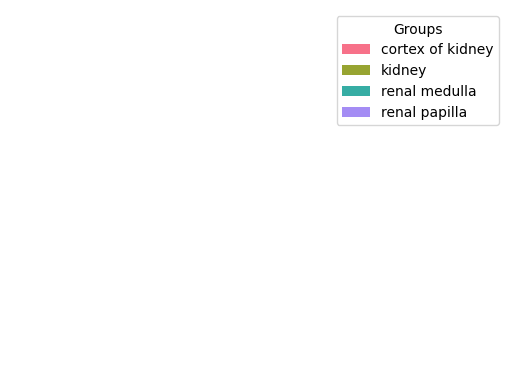

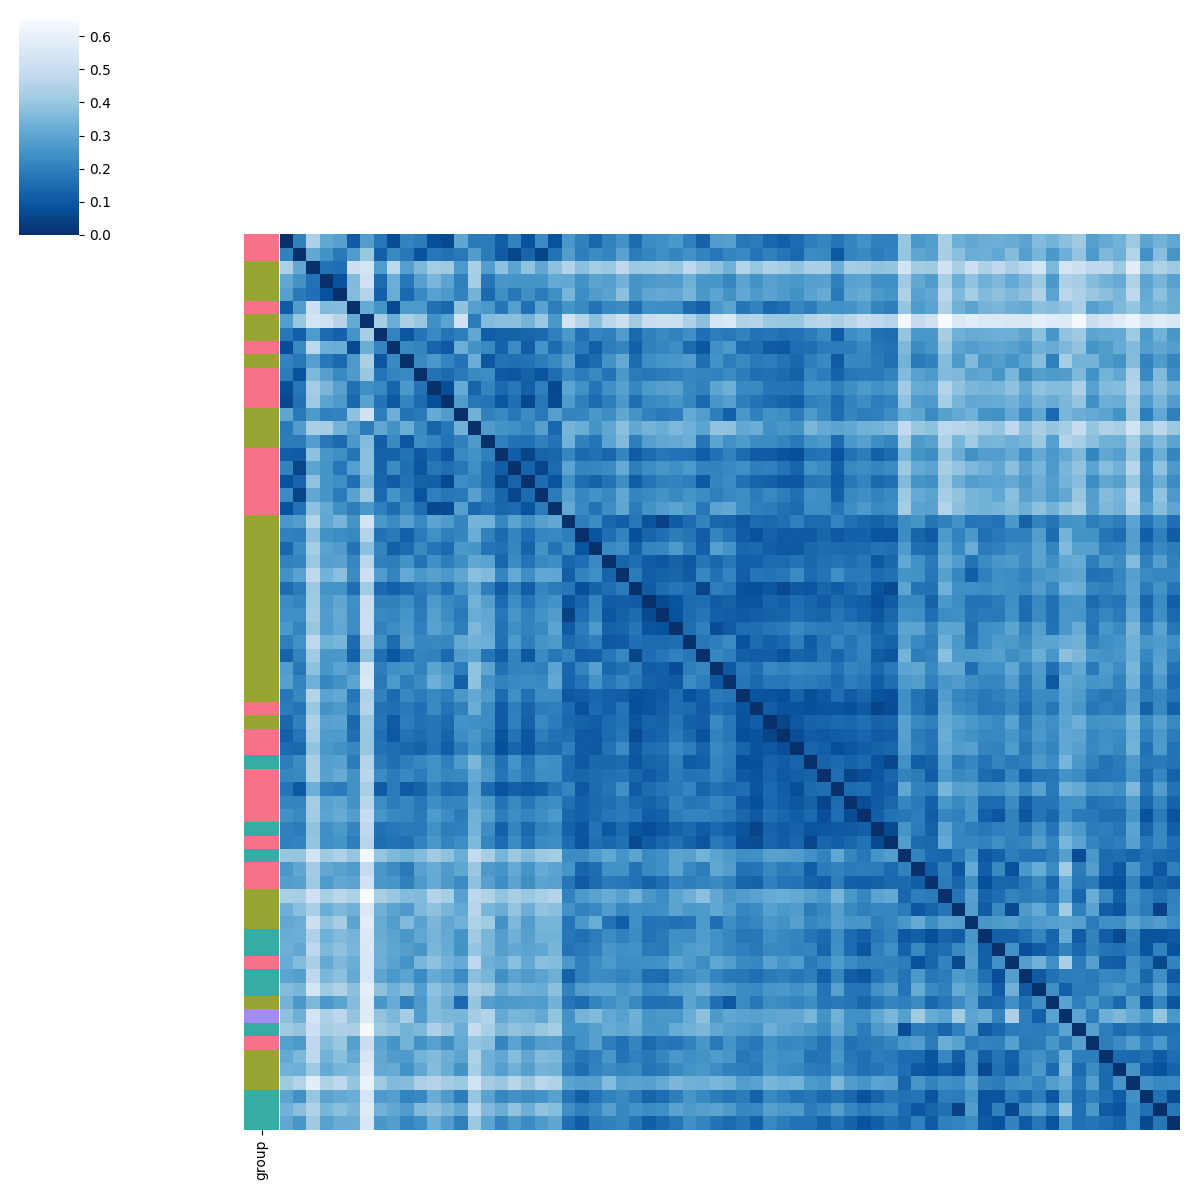

In [13]:
pl.tl.clinical_variables_corr_sub_clusters(adata,sorter_order=['1','0','2'],sample_col='donor_id',feature='tissue',proportion_df=proportion_df)

###### BMI

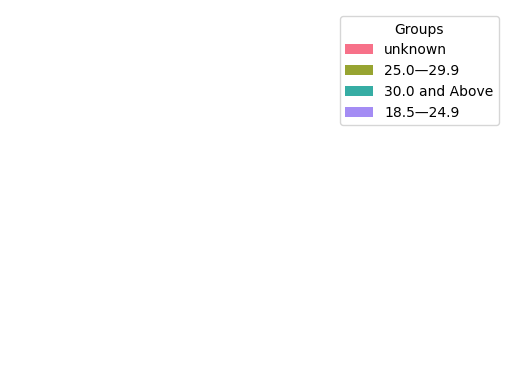

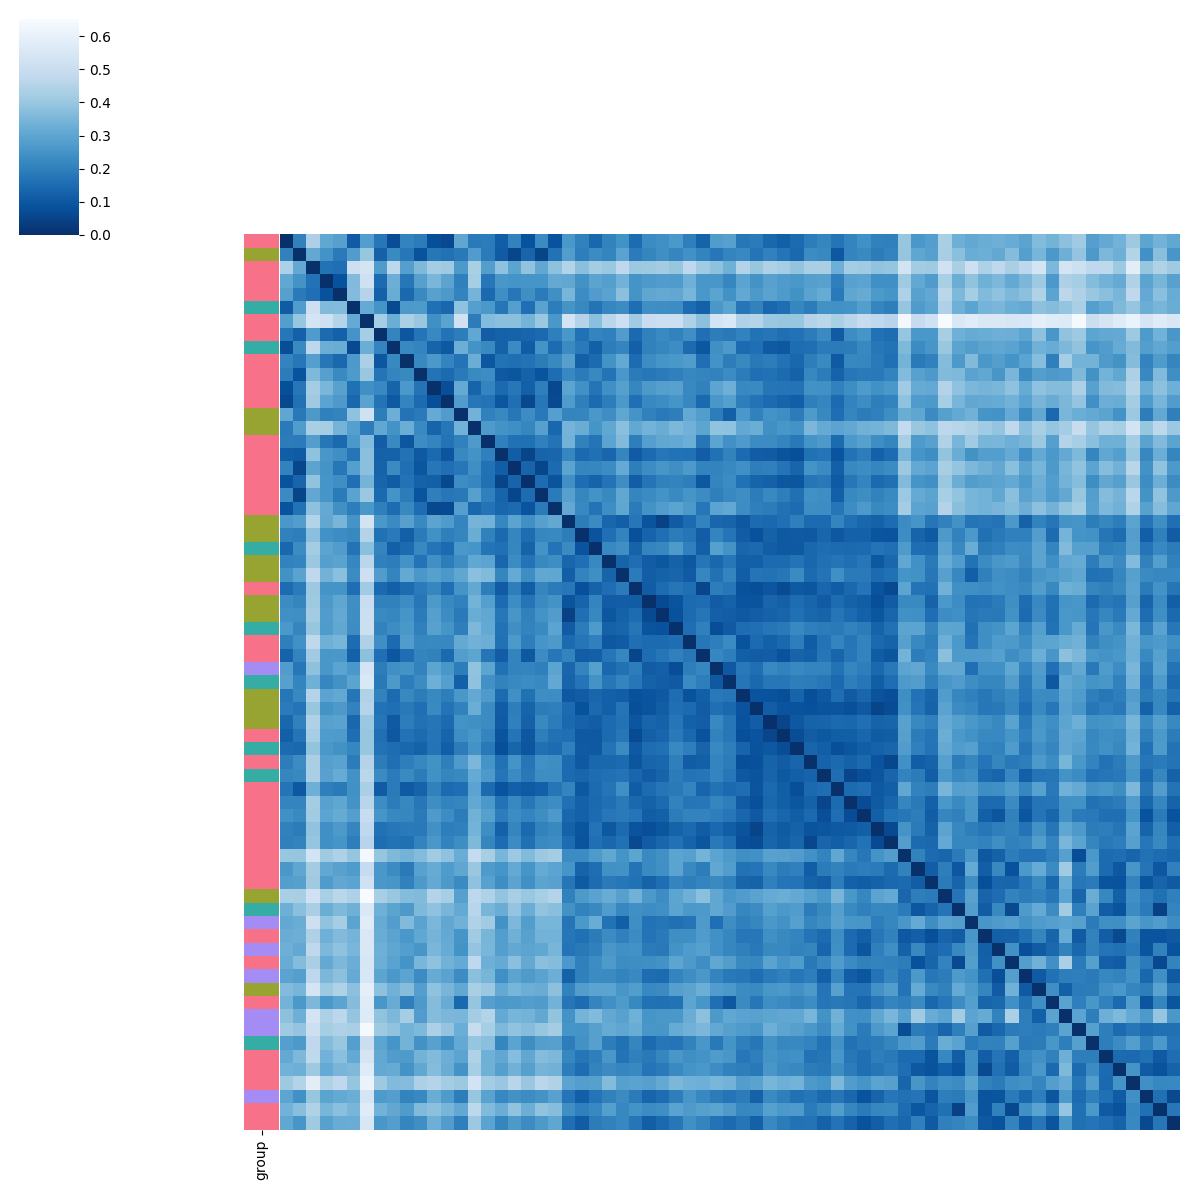

In [14]:
pl.tl.clinical_variables_corr_sub_clusters(adata,sorter_order=['1','0','2'],sample_col='donor_id',feature='BMI',proportion_df=proportion_df)

#### Investigating after filtration

Here, we use the all previous steps for the filtered data set (only samples associated with the kidney (or whole kidney) location).You can download the Anndata (h5ad) file from [here](https://costalab.ukaachen.de/open_data/PILOT/Kidney_filtered.h5ad), and place it in the _Datasets_ folder.

In [15]:
adata_filtered=sc.read_h5ad('/Datasets/Kidney_filtered.h5ad')

In [16]:
pl.tl.wasserstein_distance(
    adata_filtered,
    emb_matrix = 'X_pca',
    clusters_col = 'cell_type',
    sample_col = 'donor_id',
    status = 'disease'
    )

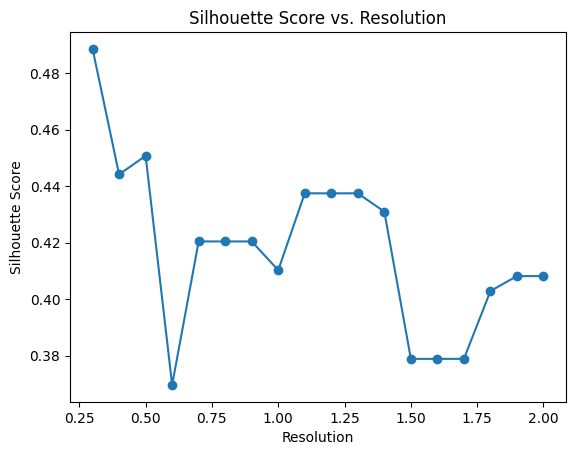

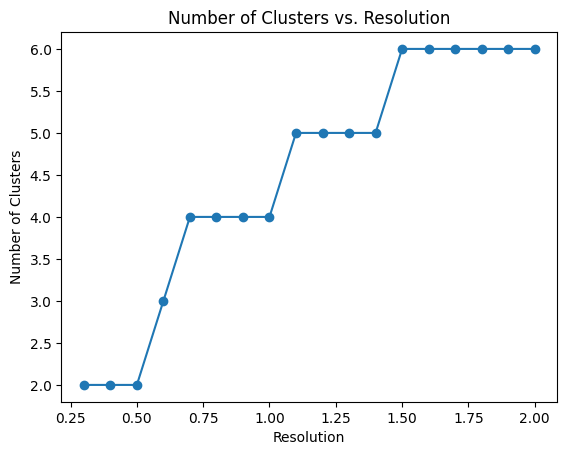

In [17]:
pl.pl.select_best_sil(adata_filtered, start = 0.3)

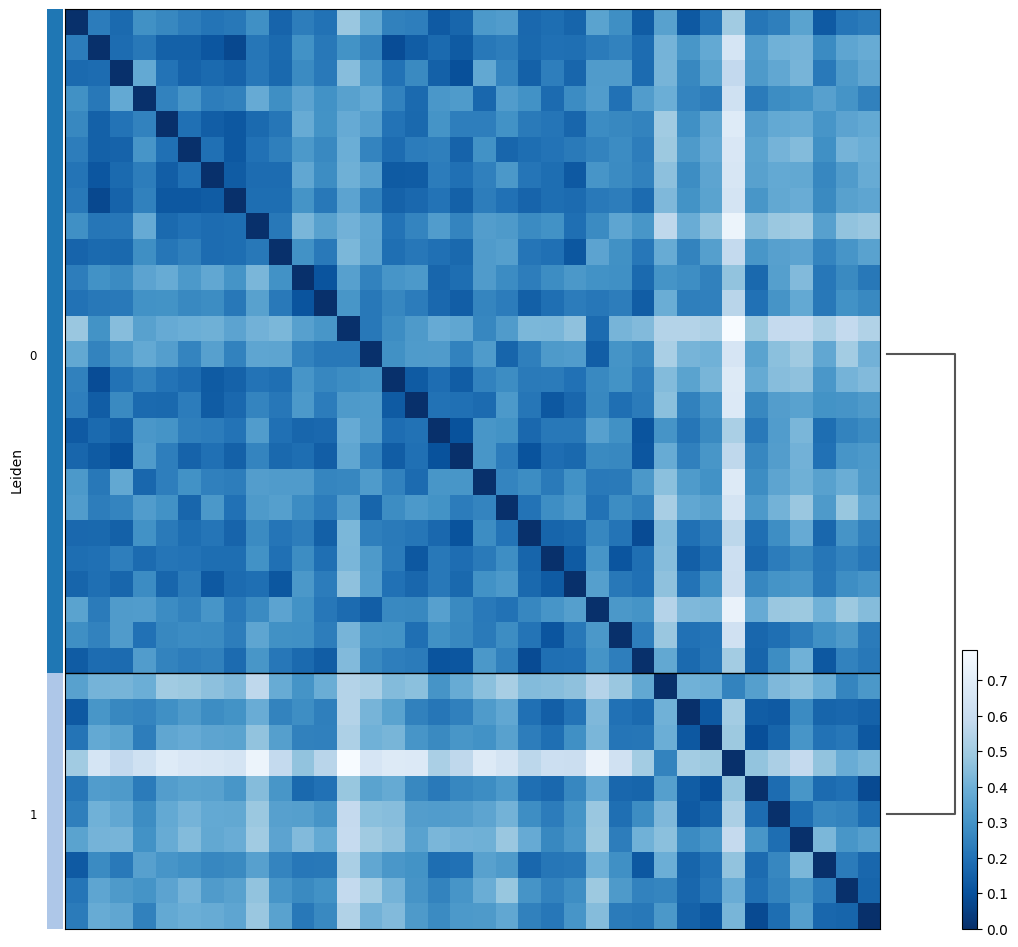

In [18]:
proportion_df=pl.pl.clustering_emd(adata_filtered, res = adata_filtered.uns['best_res'],show_gene_labels=False,sorter_leiden=['0','1'],save=True)

In [20]:
pl.tl.correlation_categorical_with_clustering(adata_filtered,proportion_df,sample_col= 'donor_id', features = categorical)

Feature  ChiSquared_Statistic  ChiSquared_PValue
6           disease             17.488757           0.000159
5  diabetes_history              6.784615           0.009195
0               BMI              7.857195           0.049057

#### Visualizing Feature Distribution Within Patients sub-group 

###### Disease

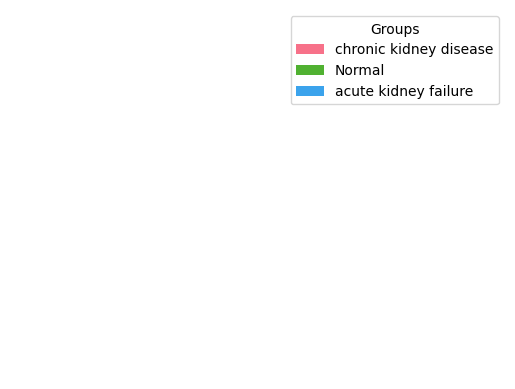

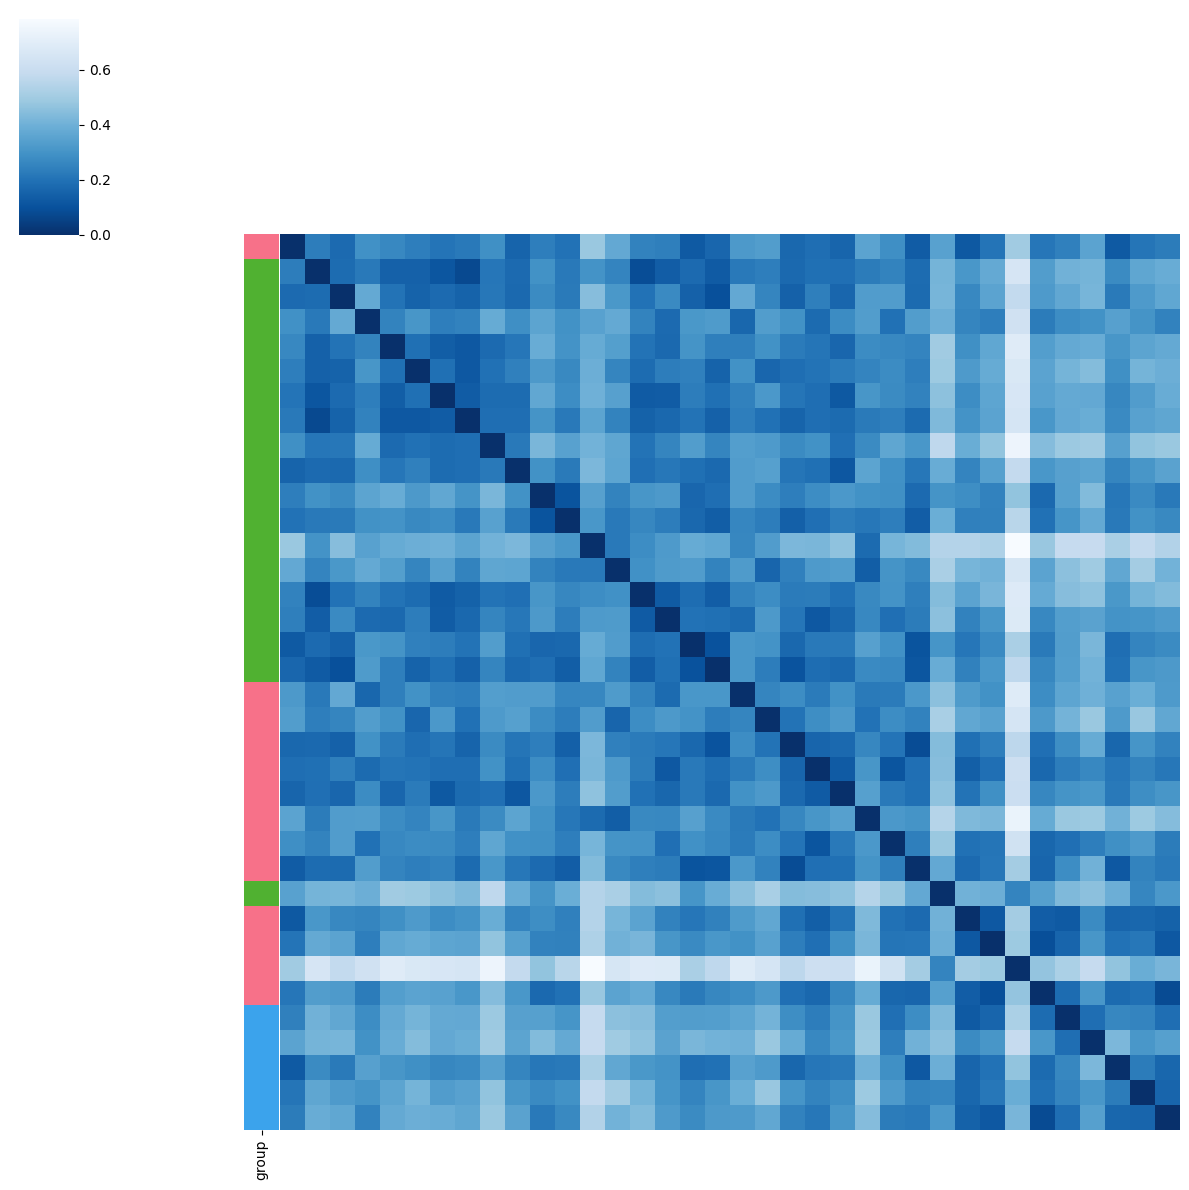

In [21]:
pl.tl.clinical_variables_corr_sub_clusters(adata_filtered, sorter_order=['0','1'],sample_col='donor_id',feature= 'disease',proportion_df = proportion_df)

###### BMI

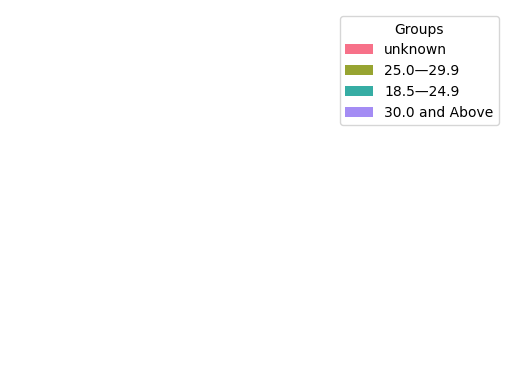

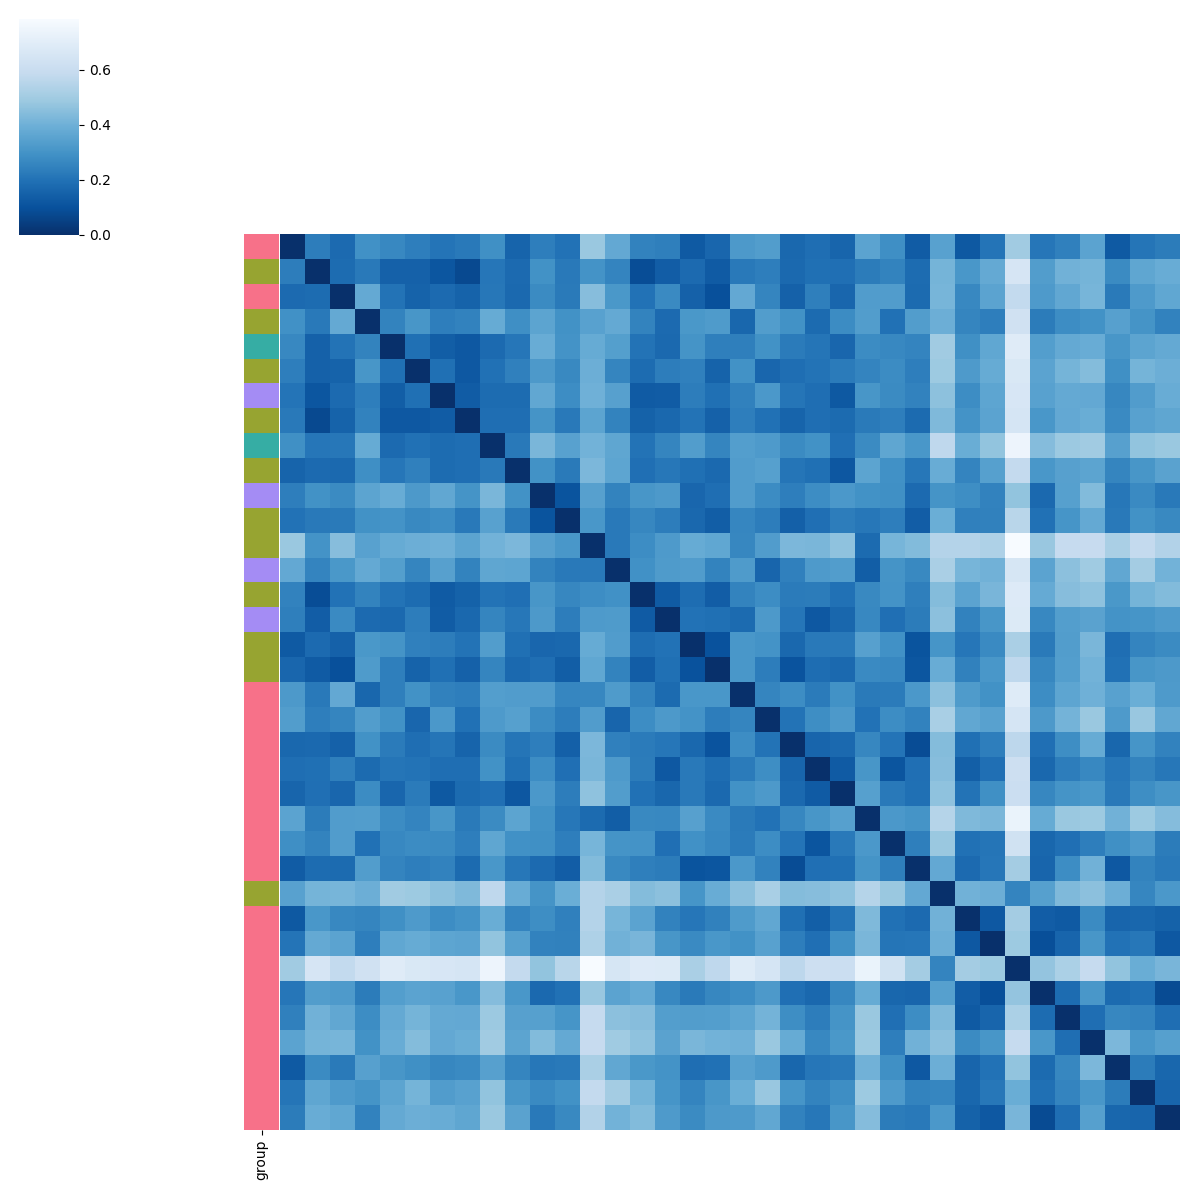

In [22]:
pl.tl.clinical_variables_corr_sub_clusters(adata_filtered, sorter_order = ['0','1'],sample_col = 'donor_id',feature = 'BMI',proportion_df = proportion_df)

###### Diabetes_history

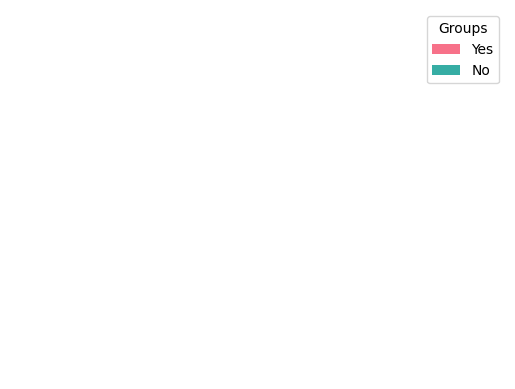

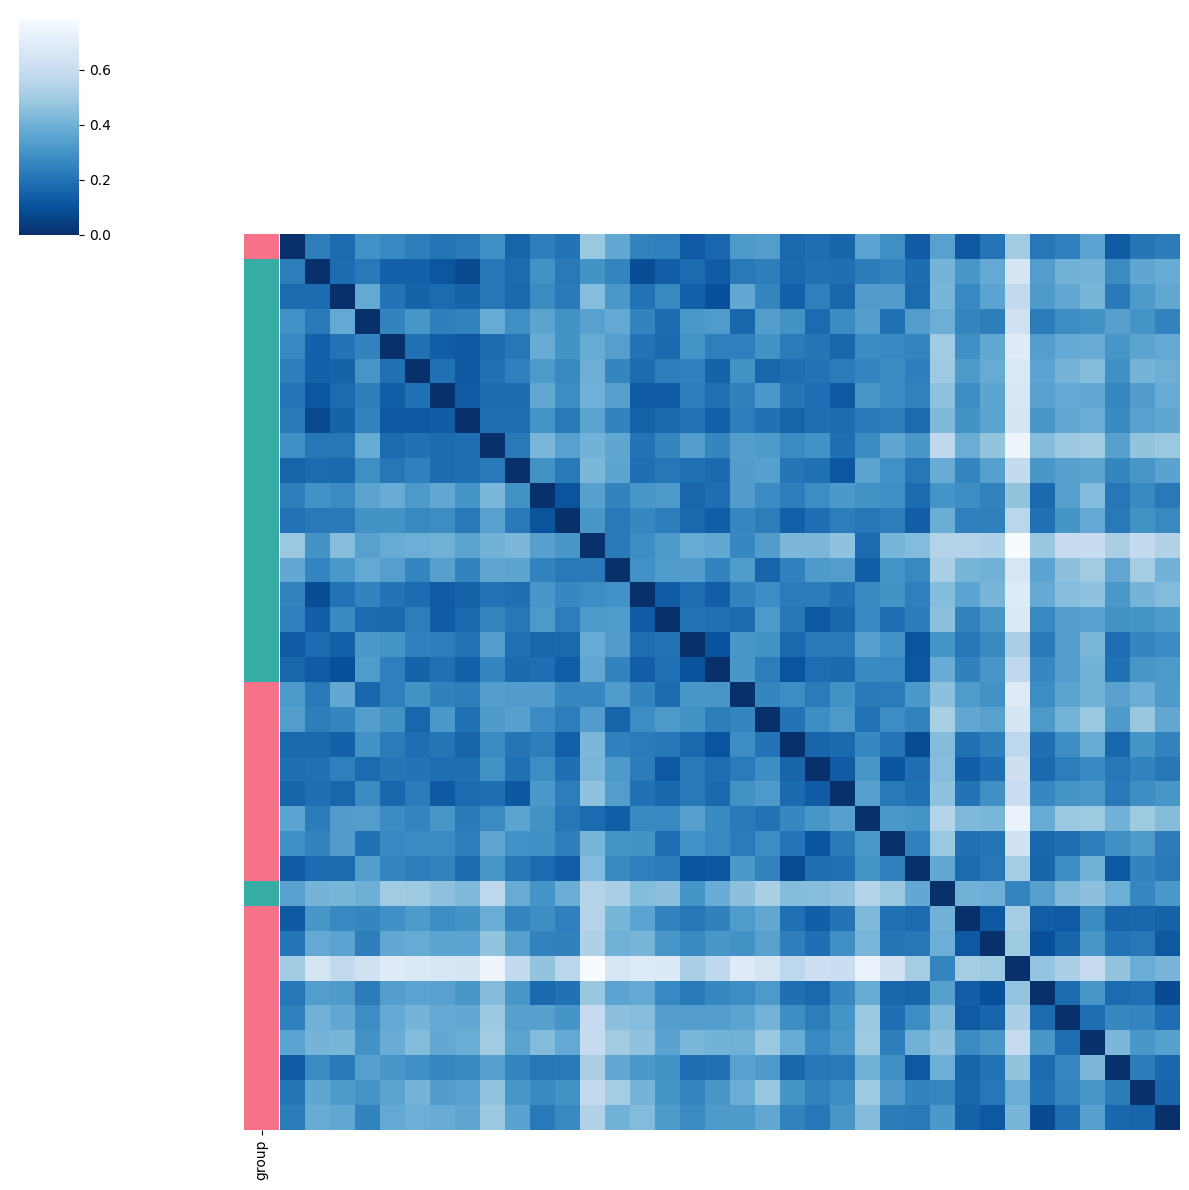

In [23]:
pl.tl.clinical_variables_corr_sub_clusters(adata_filtered, sorter_order = ['0','1'],sample_col = 'donor_id',feature = 'diabetes_history',proportion_df = proportion_df)